In [1]:
# Cell 1: Import Library & Upload Data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

# Konfigurasi visualisasi biar cantik
sns.set(style="whitegrid")

print("Silakan upload file 'train.csv' kamu:")
uploaded = files.upload()

Silakan upload file 'train.csv' kamu:


Saving train.csv to train.csv


In [2]:
# Cell 2: Membaca & Menampilkan Info Dasar
# Pastikan nama filenya sesuai dengan yang diupload (biasanya 'train.csv')
filename = list(uploaded.keys())[0]
df = pd.read_csv(filename)

# Menampilkan 5 data teratas
print("=== 5 Data Teratas ===")
display(df.head())

# Menampilkan informasi tipe data dan missing value
print("\n=== Informasi Dataset ===")
df.info()

# Cek apakah ada data kosong?
print(f"\nJumlah Missing Value: {df.isnull().sum().sum()}")

=== 5 Data Teratas ===


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1



=== Informasi Dataset ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-n

/tmp/ipython-input-2357540182.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='price_range', data=df, palette='viridis')


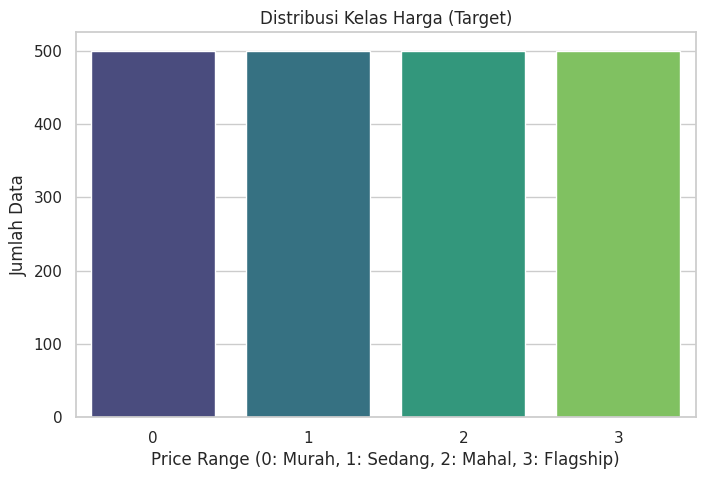

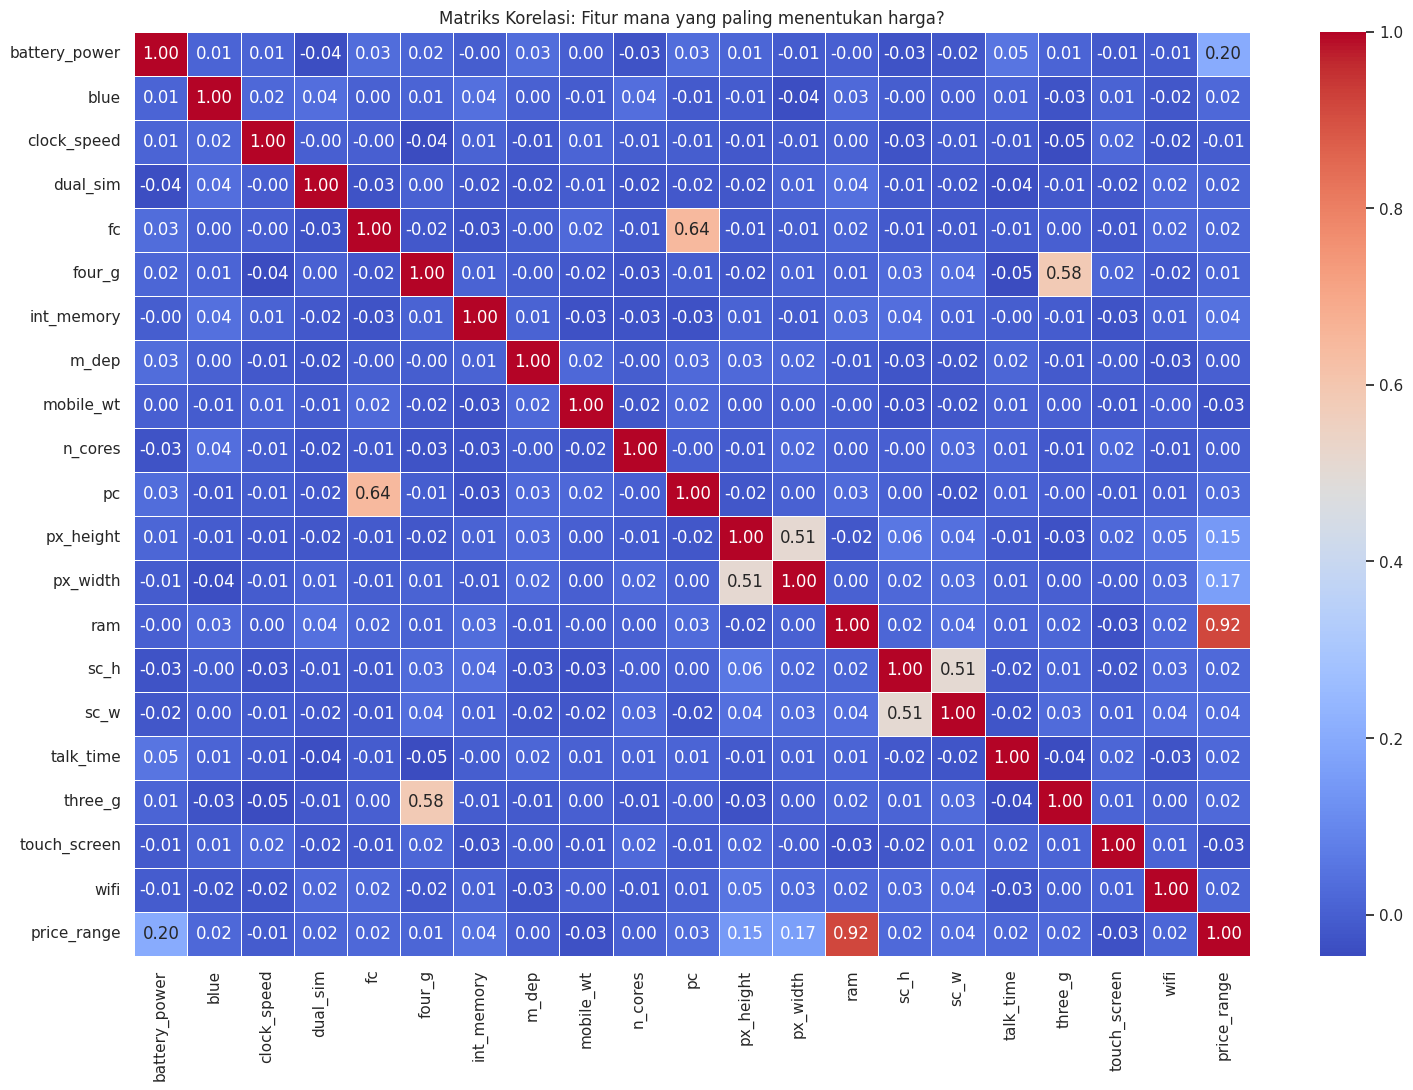

/tmp/ipython-input-2357540182.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='price_range', y='ram', data=df, palette='Set2')


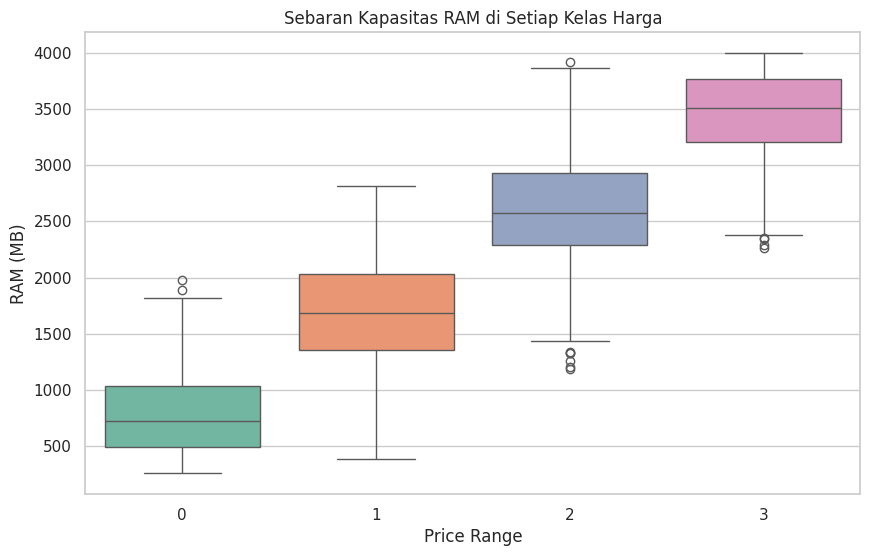

In [3]:
# Cell 3: Exploratory Data Analysis (EDA)

# 1. Cek Keseimbangan Target (Price Range)
# Ini penting buat memastikan model tidak bias ke satu kelas saja
plt.figure(figsize=(8, 5))
sns.countplot(x='price_range', data=df, palette='viridis')
plt.title('Distribusi Kelas Harga (Target)')
plt.xlabel('Price Range (0: Murah, 1: Sedang, 2: Mahal, 3: Flagship)')
plt.ylabel('Jumlah Data')
plt.show()

# 2. Matriks Korelasi (Heatmap)
# Ini "senjata utama" buat bab SELEKSI FITUR
# Perhatikan baris/kolom 'price_range', kotak mana yang warnanya paling mencolok?
plt.figure(figsize=(18, 12))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Matriks Korelasi: Fitur mana yang paling menentukan harga?')
plt.show()

# 3. Deep Dive: Hubungan RAM vs Harga
# Kita buktikan apakah RAM besar = Mahal?
plt.figure(figsize=(10, 6))
sns.boxplot(x='price_range', y='ram', data=df, palette='Set2')
plt.title('Sebaran Kapasitas RAM di Setiap Kelas Harga')
plt.xlabel('Price Range')
plt.ylabel('RAM (MB)')
plt.show()

In [4]:
# Cell 4: Data Splitting & Preprocessing (Scaling)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 1. Pisahkan Fitur (Soal) dan Target (Jawaban)
X = df.drop('price_range', axis=1)  # Ambil semua kecuali target
y = df['price_range']               # Ambil target saja

# 2. Splitting Data (80% Training : 20% Testing)
# random_state=42 adalah "angka keramat" di data science biar hasil acakannya konsisten
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Feature Scaling (Standarisasi)
# PENTING: Kita 'belajar' skala (fit) CUMA dari data Training biar gak bocor (Leakage)
scaler = StandardScaler()

# Scaling data training
X_train_scaled = scaler.fit_transform(X_train)

# Scaling data testing (pakai rumus skala yang didapat dari training)
X_test_scaled = scaler.transform(X_test)

# Cek hasil
print("=== Status Splitting ===")
print(f"Total Data Asli   : {len(df)}")
print(f"Data Training (80%): {len(X_train)} baris")
print(f"Data Testing (20%) : {len(X_test)} baris")

print("\n=== Cek Scaling (Contoh RAM) ===")
# Index 10 biasanya adalah kolom 'ram' (karena urutan kolom ke-11)
print(f"Nilai RAM Asli (Baris pertama) : {X_train.iloc[0]['ram']}")
print(f"Nilai RAM Scaled (Baris pertama): {X_train_scaled[0][10]:.4f}")

=== Status Splitting ===
Total Data Asli   : 2000
Data Training (80%): 1600 baris
Data Testing (20%) : 400 baris

=== Cek Scaling (Contoh RAM) ===
Nilai RAM Asli (Baris pertama) : 1489.0
Nilai RAM Scaled (Baris pertama): 0.0203


=== HASIL EVALUASI (K=10) ===
Akurasi Model: 55.50%

Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.76      0.73       105
           1       0.39      0.43      0.41        91
           2       0.38      0.43      0.41        92
           3       0.79      0.56      0.66       112

    accuracy                           0.56       400
   macro avg       0.56      0.55      0.55       400
weighted avg       0.58      0.56      0.56       400



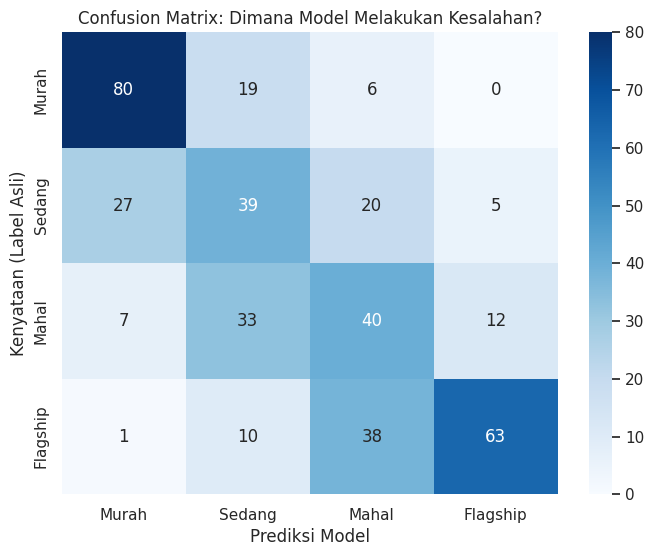


Model berhasil disimpan dengan nama file: model_knn_harga_hp.pkl
Silakan cek menu 'Files' di sebelah kiri Colab untuk mendownloadnya.


In [5]:
# Cell 5: Modeling (KNN), Evaluasi, dan Menyimpan Model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import joblib # Untuk menyimpan model

# --- 1. MODELING ---
# Kita set jumlah tetangga (K) = 10
k = 10
knn_model = KNeighborsClassifier(n_neighbors=k)

# Proses Training (Si Model menghapal data X_train dan kuncinya y_train)
knn_model.fit(X_train_scaled, y_train)

# --- 2. PREDIKSI ---
# Minta model mengerjakan soal ujian (X_test)
y_pred = knn_model.predict(X_test_scaled)

# --- 3. EVALUASI ---
# Hitung nilai akurasi
akurasi = accuracy_score(y_test, y_pred)
print(f"=== HASIL EVALUASI (K={k}) ===")
print(f"Akurasi Model: {akurasi * 100:.2f}%\n")

# Tampilkan detail performa (Precision, Recall, F1-Score)
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Tampilkan Confusion Matrix (Tabel Kebenaran/Kesalahan)
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Murah', 'Sedang', 'Mahal', 'Flagship'], yticklabels=['Murah', 'Sedang', 'Mahal', 'Flagship'])
plt.title('Confusion Matrix: Dimana Model Melakukan Kesalahan?')
plt.xlabel('Prediksi Model')
plt.ylabel('Kenyataan (Label Asli)')
plt.show()

# --- 4. SIMPAN MODEL ---
# Menyimpan model ke file .pkl agar bisa didownload
filename = 'model_knn_harga_hp.pkl'
joblib.dump(knn_model, filename)
print(f"\nModel berhasil disimpan dengan nama file: {filename}")
print("Silakan cek menu 'Files' di sebelah kiri Colab untuk mendownloadnya.")

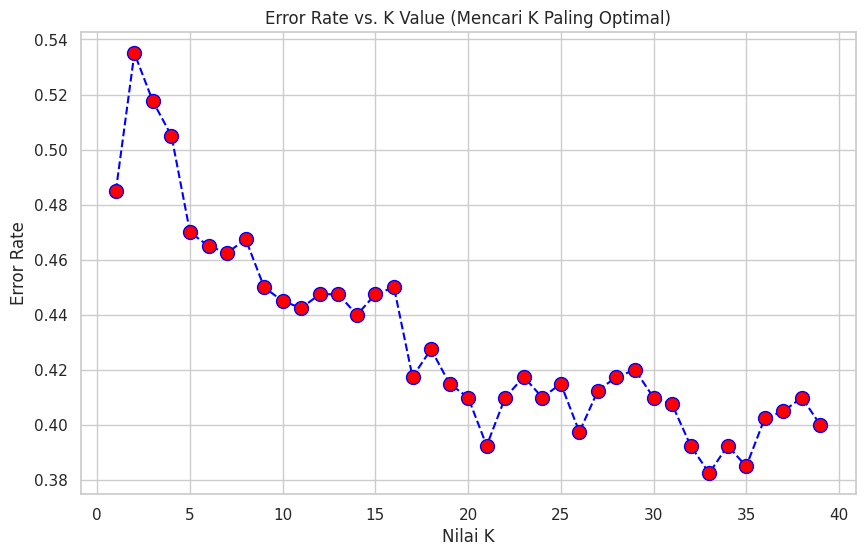

Nilai K terbaik sepertinya ada di angka: 33


In [6]:
# Cell 6: Evaluasi & Perbaikan (Mencari Nilai K Terbaik)

error_rate = []

# Coba nilai K dari 1 sampai 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_scaled, y_train)
    pred_i = knn.predict(X_test_scaled)
    # Catat rata-rata error (kesalahan)
    error_rate.append(np.mean(pred_i != y_test))

# Gambar Grafik Error vs Nilai K
plt.figure(figsize=(10, 6))
plt.plot(range(1, 40), error_rate, color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value (Mencari K Paling Optimal)')
plt.xlabel('Nilai K')
plt.ylabel('Error Rate')
plt.show()

# Cari K dengan error terendah otomatis
best_k = error_rate.index(min(error_rate)) + 1
print(f"Nilai K terbaik sepertinya ada di angka: {best_k}")

Menggunakan fitur terpilih: ['ram', 'battery_power', 'px_width', 'px_height']

=== HASIL AKHIR (Seleksi Fitur + K=33) ===
Akurasi Melesat Menjadi: 91.50%


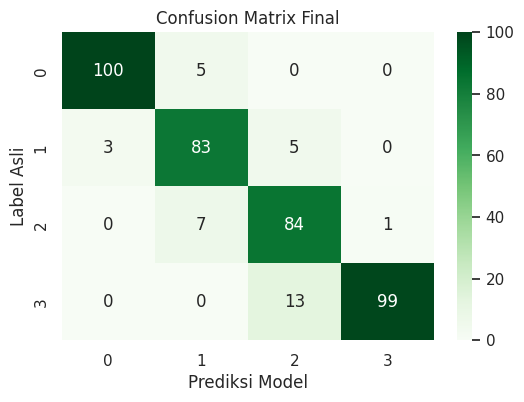

['model_final_terbaik.pkl']

In [7]:
# Cell 7: OPTIMALISASI AKHIR (Seleksi Fitur + Best K)

# 1. Kita pilih fitur yang korelasi-nya tinggi saja (Berdasarkan Heatmap tadi)
# Fitur juara: RAM, Battery Power, Pixel Width, Pixel Height
selected_features = ['ram', 'battery_power', 'px_width', 'px_height']

print(f"Menggunakan fitur terpilih: {selected_features}")

# 2. Siapkan data baru (Cuma kolom terpilih)
X_selected = df[selected_features]
y_selected = df['price_range']

# 3. Split ulang (80:20)
X_train_sel, X_test_sel, y_train_sel, y_test_sel = train_test_split(
    X_selected, y_selected, test_size=0.2, random_state=42
)

# 4. Scaling ulang (Wajib!)
scaler_sel = StandardScaler()
X_train_sel_scaled = scaler_sel.fit_transform(X_train_sel)
X_test_sel_scaled = scaler_sel.transform(X_test_sel)

# 5. Training dengan K Terbaik tadi (K=33)
# Note: Kadang kalau fiturnya dikit, K kecil (misal 11 atau 15) malah lebih bagus.
# Kita coba K=33 dulu sesuai temuanmu.
final_k = 33
model_final = KNeighborsClassifier(n_neighbors=final_k)
model_final.fit(X_train_sel_scaled, y_train_sel)

# 6. Prediksi & Evaluasi Akhir
y_pred_final = model_final.predict(X_test_sel_scaled)
akurasi_final = accuracy_score(y_test_sel, y_pred_final)

print(f"\n=== HASIL AKHIR (Seleksi Fitur + K={final_k}) ===")
print(f"Akurasi Melesat Menjadi: {akurasi_final * 100:.2f}%")

# Confusion Matrix Final
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test_sel, y_pred_final), annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix Final')
plt.ylabel('Label Asli')
plt.xlabel('Prediksi Model')
plt.show()

# Simpan Model Final (Ini yang nanti dikumpul/diupload)
joblib.dump(model_final, 'model_final_terbaik.pkl')